# GIS Final Project: Berry Cultivation in Jalisco

DSAN 6750 / PPOL 6805: GIS for Spatial Data Science

Juan Pablo Fernandez (Georgetown University)

## Introduction: Berries’ production in Jalisco and their importance for rural development

Berry cultivation — including strawberries, raspberries, blueberries, and blackberries — has become one of the most dynamic agricultural activities in Jalisco. These crops are considered high‑value and are strongly export‑oriented, contributing significantly to the rural economy and positioning Mexico as a global leader in berry exports.

According to the Mexican government, berries are the second agricultural product with the highest export value nationwide, underscoring their strategic importance for rural development and the competitiveness of Jalisco’s agricultural sector (SENASICA 2025). This expansion presents an opportunity to design rural development strategies that support the sector through targeted investments in technology, infrastructure, and labor training.

However, for such policies to be effective, it is essential that the government understands the spatial distribution of berry cultivation and the factors explaining these patterns. Evidence‑based policymaking can ensure that subsidies and support programs are directed to municipalities where agroclimatic conditions, labor availability, and logistical advantages combine to maximize the impact of public investment.

## Project design

This project investigates the spatial determinants of berry cultivation in Jalisco, Mexico, focusing on strawberries, raspberries, blueberries, and blackberries. Using municipality-level data, I will model the relationship between agroclimatic suitability (altitude, precipitation, temperature, and water availability) and the surface area cultivated with berries. I will then incorporate proximity to federal highways to account for logistical advantages in export-oriented production. Moreover, as a labor-intensive crop, the model will also consider the number of workers employed in agriculture.

To test for spatial clustering effects beyond these variables, I will estimate a spatial lag regression model, assessing whether the presence of neighboring plantations significantly improves predictive power. I will use Moran’s I to measure spatial autocorrelation in the residuals before and after introducing the spatial lag term, allowing me to evaluate whether clustering is driven by unobserved spatial dynamics such as access to specialized services or cold storage.

The findings aim to inform rural development strategies by identifying spatial barriers and opportunities for expanding high-value agriculture.

## Hypothesis framing the research question

*Null Hypothesis (H₀):* The presence and extent of berry plantations in Jalisco municipalities are fully explained by agroclimatic conditions, number of people dedicated to agriculture, and proximity to federal highways. There is no additional spatial clustering effect beyond these variables.

*Alternative Hypothesis (H₁):* Berry plantations exhibit spatial clustering that cannot be fully explained by agroclimatic conditions, demographics, or highway proximity — suggesting that proximity to other plantations (e.g., access to specialized services or cold storage) significantly influences their location.

## Initial coding and data preparation

*0. Explore the shapefile for the 125 municipalities of Jalisco*

The coordinates for the polygons corresponding to each of the 125 municipalities of Jalisco where retrieved from the government agency dedicated to demographic and geographic information, INEGI.

The shapefile has the 125 polyogons corresponding to each of the state’s municipalities

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.4.0; sf_use_s2() is TRUE


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Reading layer `LimiteMunicipal2012' from data source 
  `/home/jupyter-jf1677/gis-project/LimiteMunicipal2012/LimiteMunicipal2012.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 125 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 427476 ymin: 2096902 xmax: 865450.6 ymax: 2515726
Projected CRS: WGS 84 / UTM zone 13N

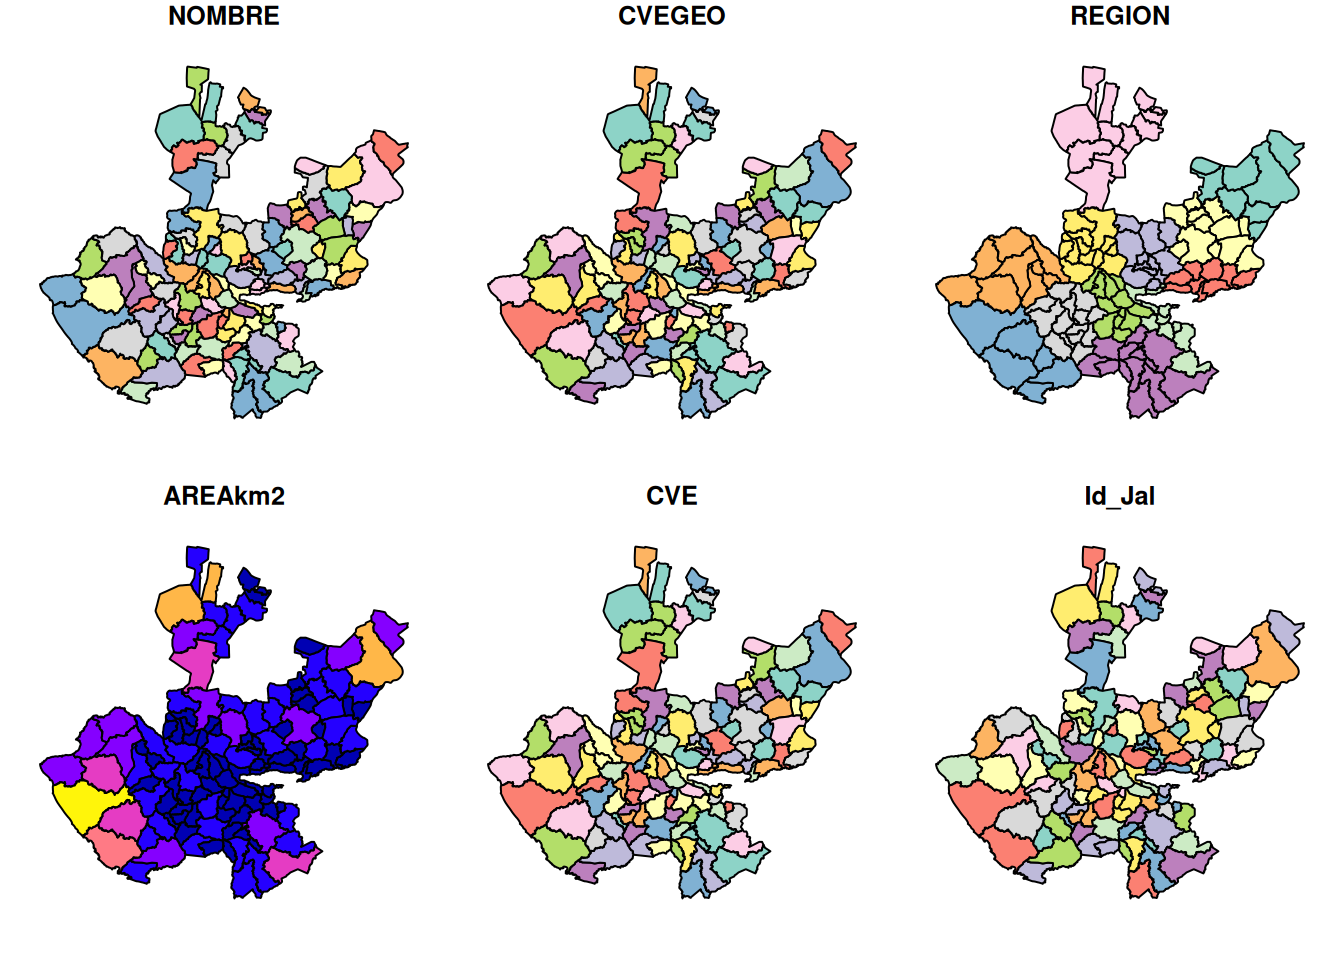

In [ ]:
library(sf)

*1. Calculate the average elevation for each municipality:*

Install the elevatr package first

In [ ]:
install.packages("elevatr")

Installing package into '/home/jupyter-jf1677/R/x86_64-pc-linux-gnu-library/4.3'
(as 'lib' is unspecified)

Computation of average elevation // this process takes time

In [ ]:
library(sf)
library(terra)

terra 1.8.86

elevatr v0.99.0 NOTE: Version 0.99.0 of 'elevatr' uses 'sf' and 'terra'.  Use 
of the 'sp', 'raster', and underlying 'rgdal' packages by 'elevatr' is being 
deprecated; however, get_elev_raster continues to return a RasterLayer.  This 
will be dropped in future versions, so please plan accordingly.

Reading layer `LimiteMunicipal2012' from data source 
  `/home/jupyter-jf1677/gis-project/LimiteMunicipal2012/LimiteMunicipal2012.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 125 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 427476 ymin: 2096902 xmax: 865450.6 ymax: 2515726
Projected CRS: WGS 84 / UTM zone 13N

Note: Your request will download approximately 519.1Mb.

Mosaicing & Projecting

Clipping DEM to locations

Note: Elevation units are in meters.

                        municipio CVEGEO avg_elev_m
1                         TOLIMÁN  14099  1379.4055
2                           AMECA  14006  1417.4977
3                          CUQUÍO  14029  1836.5263
4                   CHIQUILISTLÁN  14032  1748.3932
5                          EJUTLA  14034  1243.8336
6                        ETZATLÁN  14036  1656.7115
7            AHUALULCO DE MERCADO  14003  1489.3812
8                       EL GRULLO  14037   997.3953
9                     GUADALAJARA  14039  1542.9333
10            IXTLAHUACÁN DEL RÍO  14045  1628.3559
11  IXTLAHUACÁN DE LOS MEMBRILLOS  14044  1625.1330
12                      JOCOTEPEC  14050  1809.8049
13                      MAGDALENA  14055  1503.3940
14        LA MANZANILLA DE LA PAZ  14057  2005.7822
15                      MAZAMITLA  14059  2007.6252
16                  JALOSTOTITLÁN  14046  1781.8458
17                     MEXTICACÁN  14060  1770.6769
18                       LA BARCA  14018  1561.6211
19          

*2. Calculate the average precipitation and temperatures for each municipality*

Install the package for geodata:

In [ ]:
install.packages("geodata")

Installing package into '/home/jupyter-jf1677/R/x86_64-pc-linux-gnu-library/4.3'
(as 'lib' is unspecified)

Generate and save data:

In [ ]:
library(sf)
library(terra)
library(geodata)
library(dplyr)

# 1. Load Jalisco municipalities
jalisco <- st_read("LimiteMunicipal2012/LimiteMunicipal2012.shp")

Reading layer `LimiteMunicipal2012' from data source 
  `/home/jupyter-jf1677/gis-project/LimiteMunicipal2012/LimiteMunicipal2012.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 125 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 427476 ymin: 2096902 xmax: 865450.6 ymax: 2515726
Projected CRS: WGS 84 / UTM zone 13N

*3. Export table with municipal averages (temperature and precipitation):*

In [ ]:
library(dplyr)

averages_mun_table <- jalisco |>
  st_drop_geometry() |>
  select(CVEGEO, mean_temp_c, min_temp_c, max_temp_c, annual_prec_mm)

write.csv(averages_mun_table, "jalisco_municipal_avgs.csv", row.names = FALSE)

*4. Calculate adjacency to determine municipalities neighboring a berries producer*

For this I use a .dta file with information indicating which cvegeo (muncipality id) has berries

In [ ]:
library(sf)
library(dplyr)
library(haven)  # to read .dta files

# prepare data
jalisco_mun <- st_read("LimiteMunicipal2012/LimiteMunicipal2012.shp") %>%
  st_transform(4326)

Reading layer `LimiteMunicipal2012' from data source 
  `/home/jupyter-jf1677/gis-project/LimiteMunicipal2012/LimiteMunicipal2012.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 125 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 427476 ymin: 2096902 xmax: 865450.6 ymax: 2515726
Projected CRS: WGS 84 / UTM zone 13N

Warning in st_collection_extract.sf(., "POLYGON"): x is already of type
POLYGON.

## Variables used for spatial analysis

Consulting both official sources and self-generated data (using the codes above), this is the list of variables and data that will be used for spatial analysis:

Data source: `berries_jalisco_2024.dta`  
Observations: 125 \| Variables: 42 \| Date: 12 Dec 2025

| Variable | Type | Description |
|-----------------|-----------------|---------------------------------------|
| cvegeo | string | Municipality identifier (CVEGEO) |
| municipality | string | Municipality name |
| berry_place | float | Has any berry production (indicator) |
| neighbor_has_berries | integer | Neighboring municipality grows berries |
| blue | float | Produces blueberries (indicator) |
| straw | float | Produces strawberries (indicator) |
| black | float | Produces blackberries (indicator) |
| rasp | float | Produces raspberries (indicator) |
| berries_count | float | Number of different berries produced |
| harvested_ha_total | float | Total harvested surface (ha) |
| surface_cat | integer | Surface category (by hectares dedicated to berries) |
| prod_value_total | float | Total production value (MXN) |
| avg_elev_m | float | Average elevation (meters above sea level) |
| annual_prec_mm | float | Annual precipitation (mm) |
| precipitation_good | float | Precipitation in optimal berry range (700–1200 mm) |
| irrigation_ha_thousands | float | Thousands of irrigated hectares |
| labor_ag_thousands | float | Thousands of workers employed in agriculture |
| with_federal_highway | byte | Municipality has a federal toll highway (indicator) |
| surface_perc_ag | float | Percent of municipal surface used for agriculture |

## Simple visualization of spatial data

*5. Generate idea maps*

All maps will be stored in the project’s folder as .png files.

First run this cell to combine the geographic data (.shp) with the data about berries production.

In [ ]:
library(sf)
library(haven)
library(dplyr)
library(ggplot2)

# --- Load data ---
jalisco_mun <- st_read("LimiteMunicipal2012/LimiteMunicipal2012.shp")

Reading layer `LimiteMunicipal2012' from data source 
  `/home/jupyter-jf1677/gis-project/LimiteMunicipal2012/LimiteMunicipal2012.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 125 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 427476 ymin: 2096902 xmax: 865450.6 ymax: 2515726
Projected CRS: WGS 84 / UTM zone 13N

*5.1. Municipalities that produce berries, indicating the number of hectares*

This is essentially the Independent Variable (Production of berries), or variable of interest

In [ ]:
# --- Create a plotting variable ---
# If no berries, set category = 0
jalisco_mun <- jalisco_mun %>%
  mutate(surface_cat_plot = ifelse(is.na(surface_cat), 0, surface_cat))

# --- Define custom palette ---
# 0 = no berries (gray), 1–4 = light to dark blue
palette <- c(
  "0" = "#e6e6e6",  # very light gray for no berries
  "1" = "#e0d4f7",  # very light lilac
  "2" = "#c6b4ea",  # soft purple
  "3" = "#9e8dd8",  # medium purple
  "4" = "#6f5bc4"   # deep purple
)

# --- Plot map ---
map_plot <- ggplot(jalisco_mun) +
  geom_sf(aes(fill = factor(surface_cat_plot)), color = "white", size = 0.2) +
  scale_fill_manual(values = palette,
                    labels = c("0" = "No berries",
                               "1" = "<100 ha",
                               "2" = "100–399 ha",
                               "3" = "400–999 ha",
                               "4" = "≥1000 ha"),
                    name = "Berry surface") +
  theme_minimal() +
  labs(title = "Berry Production in Jalisco Municipalities",
       subtitle = "Categorized by harvested area (ha)") +
  theme(legend.position = "right",
        plot.title = element_text(face = "bold"))

# --- Save map as PNG ---
ggsave("images/jalisco1_berry_map.png", plot = map_plot, width = 8, height = 6, dpi = 300)

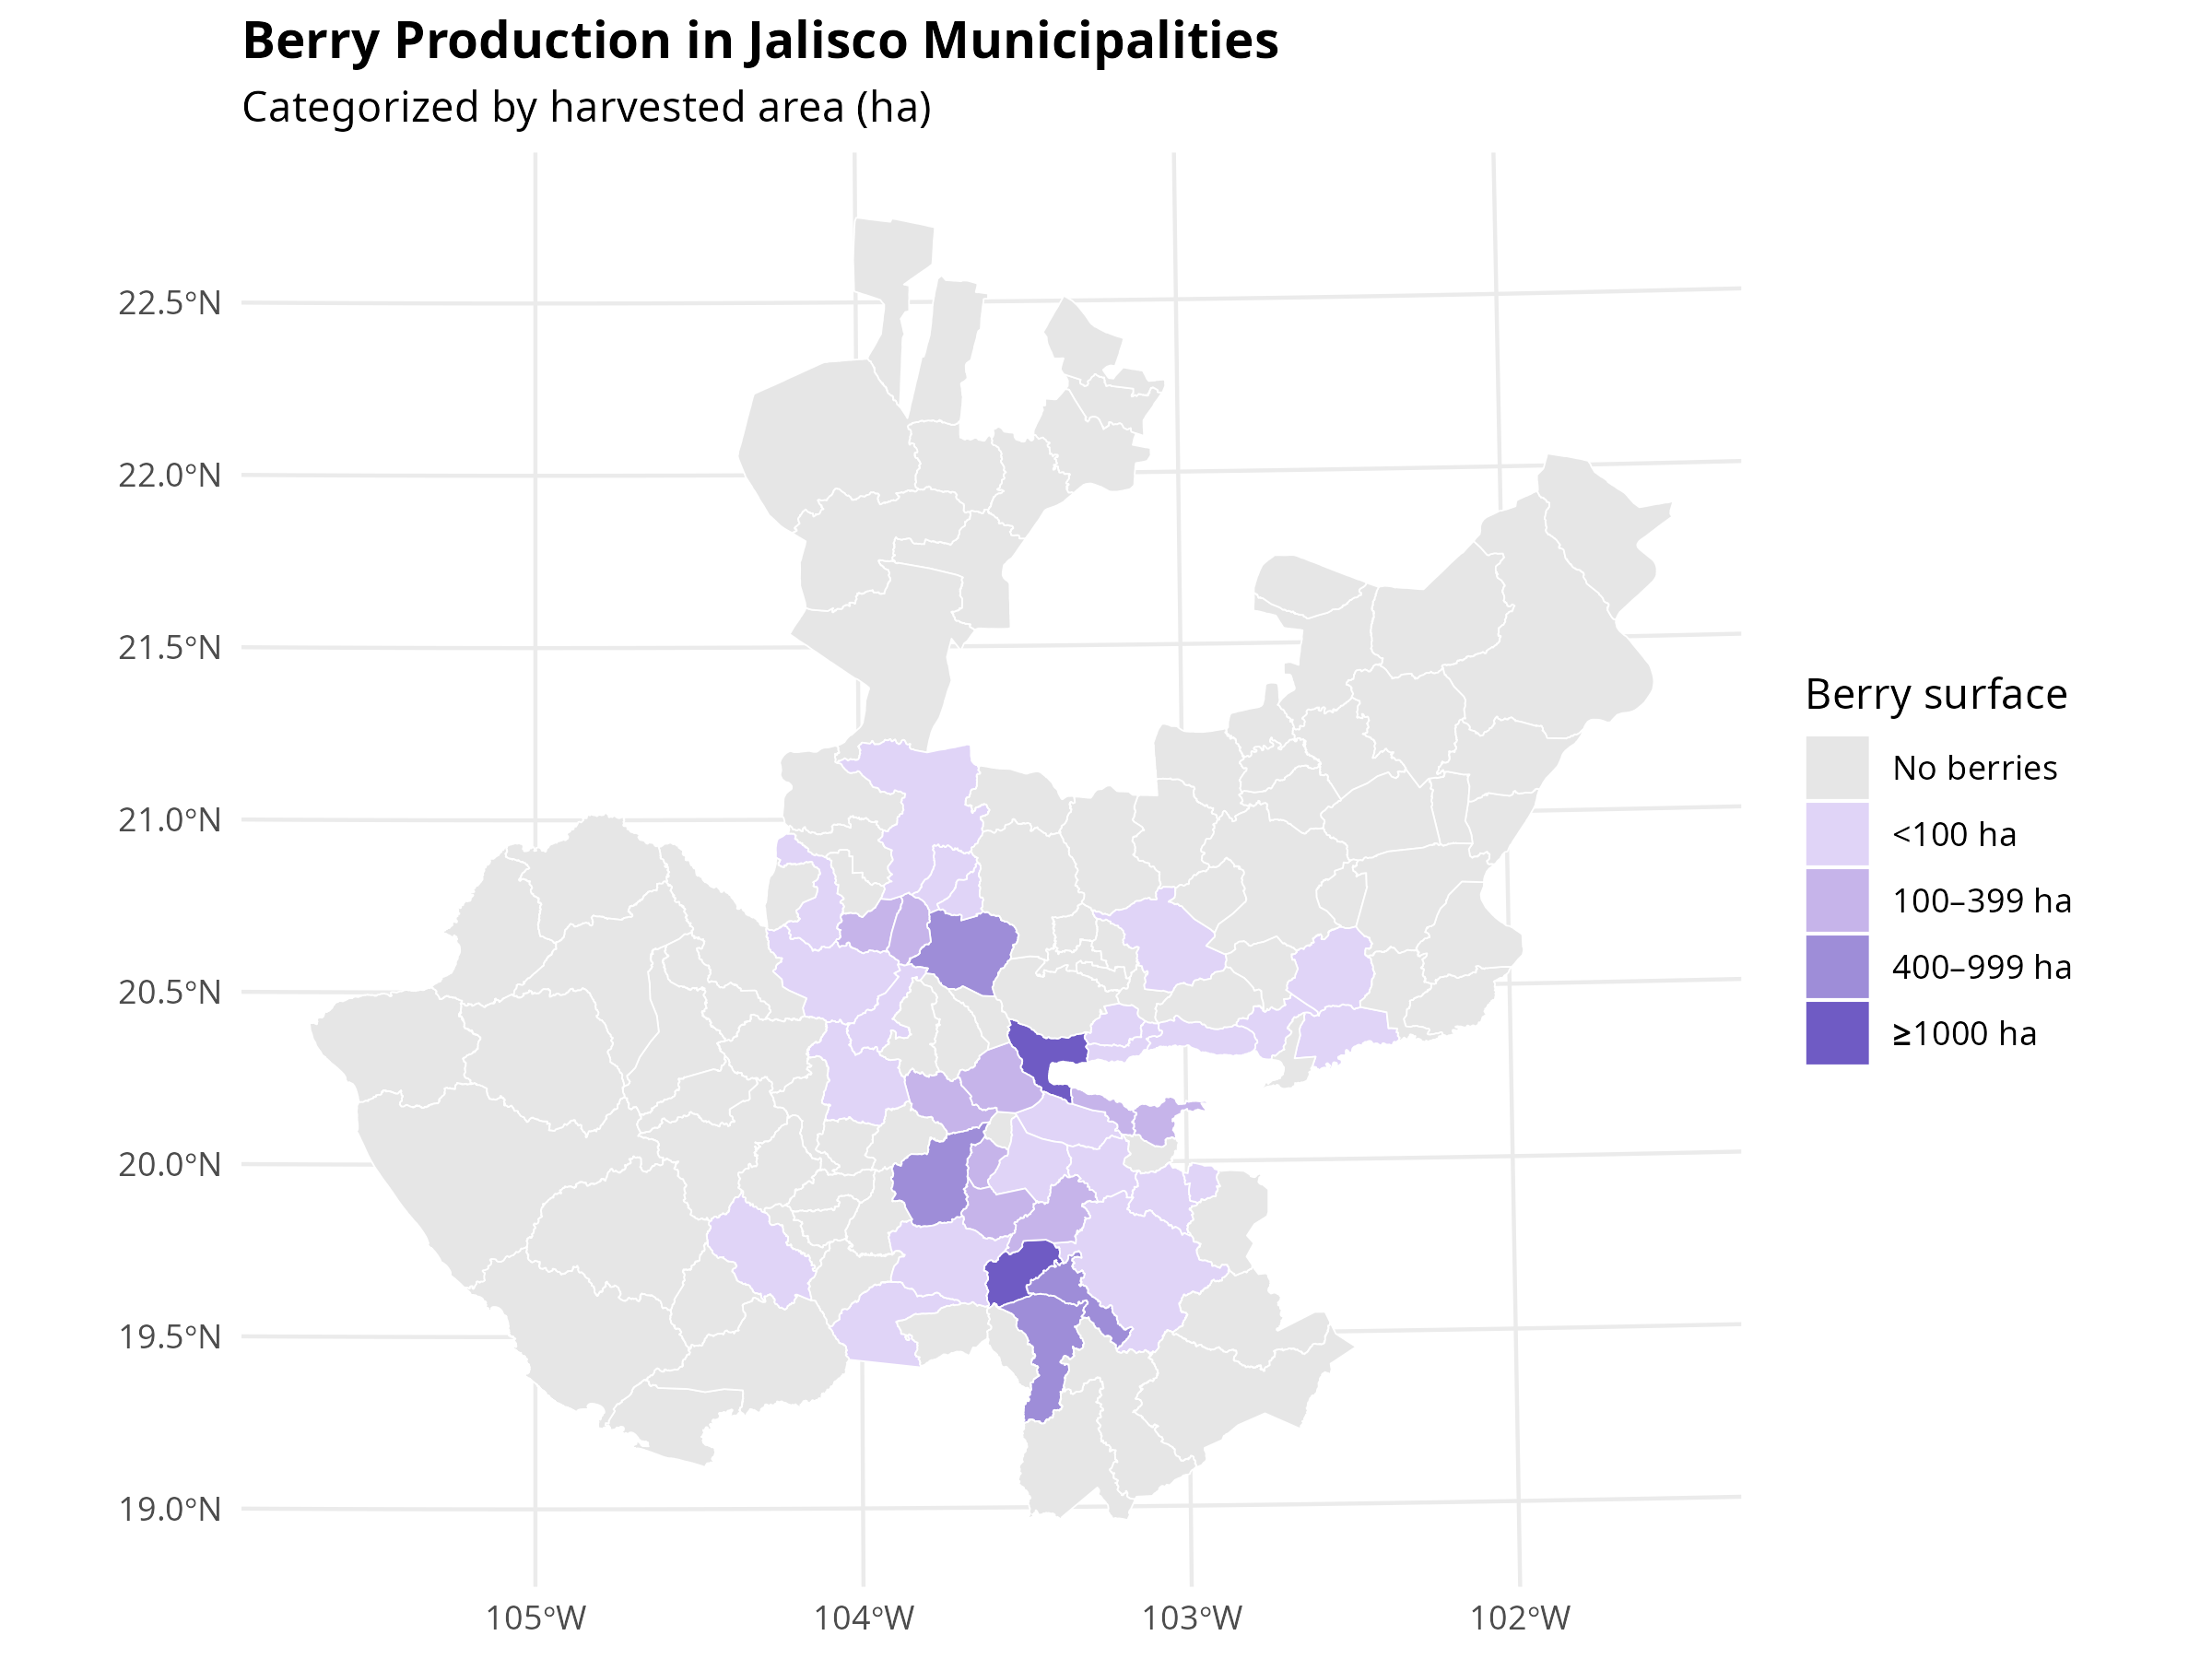

*5.2 Municipalities classified by average Elevation*

&

*5.3 Municipalities classified by annual Precipitation*

In [ ]:
# --- Elevation categories (7 quantiles) ---
jalisco_mun <- jalisco_mun %>%
  mutate(elev_cat = cut(avg_elev_m,
                        breaks = quantile(avg_elev_m, probs = seq(0, 1, length.out = 8), na.rm = TRUE),
                        include.lowest = TRUE,
                        labels = FALSE))

# --- Precipitation categories (7 quantiles) ---
jalisco_mun <- jalisco_mun %>%
  mutate(prec_cat = cut(annual_prec_mm,
                        breaks = quantile(annual_prec_mm, probs = seq(0, 1, length.out = 8), na.rm = TRUE),
                        include.lowest = TRUE,
                        labels = FALSE))

# --- Define palettes ---
gold_palette <- c("#fff7bc", "#fee391", "#fec44f", "#fe9929", "#ec7014", "#cc4c02", "#8c2d04")
blue_palette <- c("#deebf7", "#c6dbef", "#9ecae1", "#6baed6", "#4292c6", "#2171b5", "#084594")

# --- Plot Elevation Map ---
map_elev <- ggplot(jalisco_mun) +
  geom_sf(aes(fill = factor(elev_cat)), color = "white", size = 0.2) +
  scale_fill_manual(values = gold_palette,
                    name = "Elevation (m)",
                    labels = paste0("Q", 1:7)) +
  theme_minimal() +
  labs(title = "Average Elevation of Jalisco Municipalities",
       subtitle = "Categorized into 7 quantiles") +
  theme(legend.position = "right",
        plot.title = element_text(face = "bold"))

ggsave("images/jalisco2_elevation_map.png", plot = map_elev, width = 8, height = 6, dpi = 300)

# --- Plot Precipitation Map ---
map_prec <- ggplot(jalisco_mun) +
  geom_sf(aes(fill = factor(prec_cat)), color = "white", size = 0.2) +
  scale_fill_manual(values = blue_palette,
                    name = "Annual Precipitation (mm)",
                    labels = paste0("Q", 1:7)) +
  theme_minimal() +
  labs(title = "Annual Precipitation in Jalisco Municipalities",
       subtitle = "Categorized into 7 quantiles") +
  theme(legend.position = "right",
        plot.title = element_text(face = "bold"))

ggsave("images/jalisco3_precipitation_map.png", plot = map_prec, width = 8, height = 6, dpi = 300)

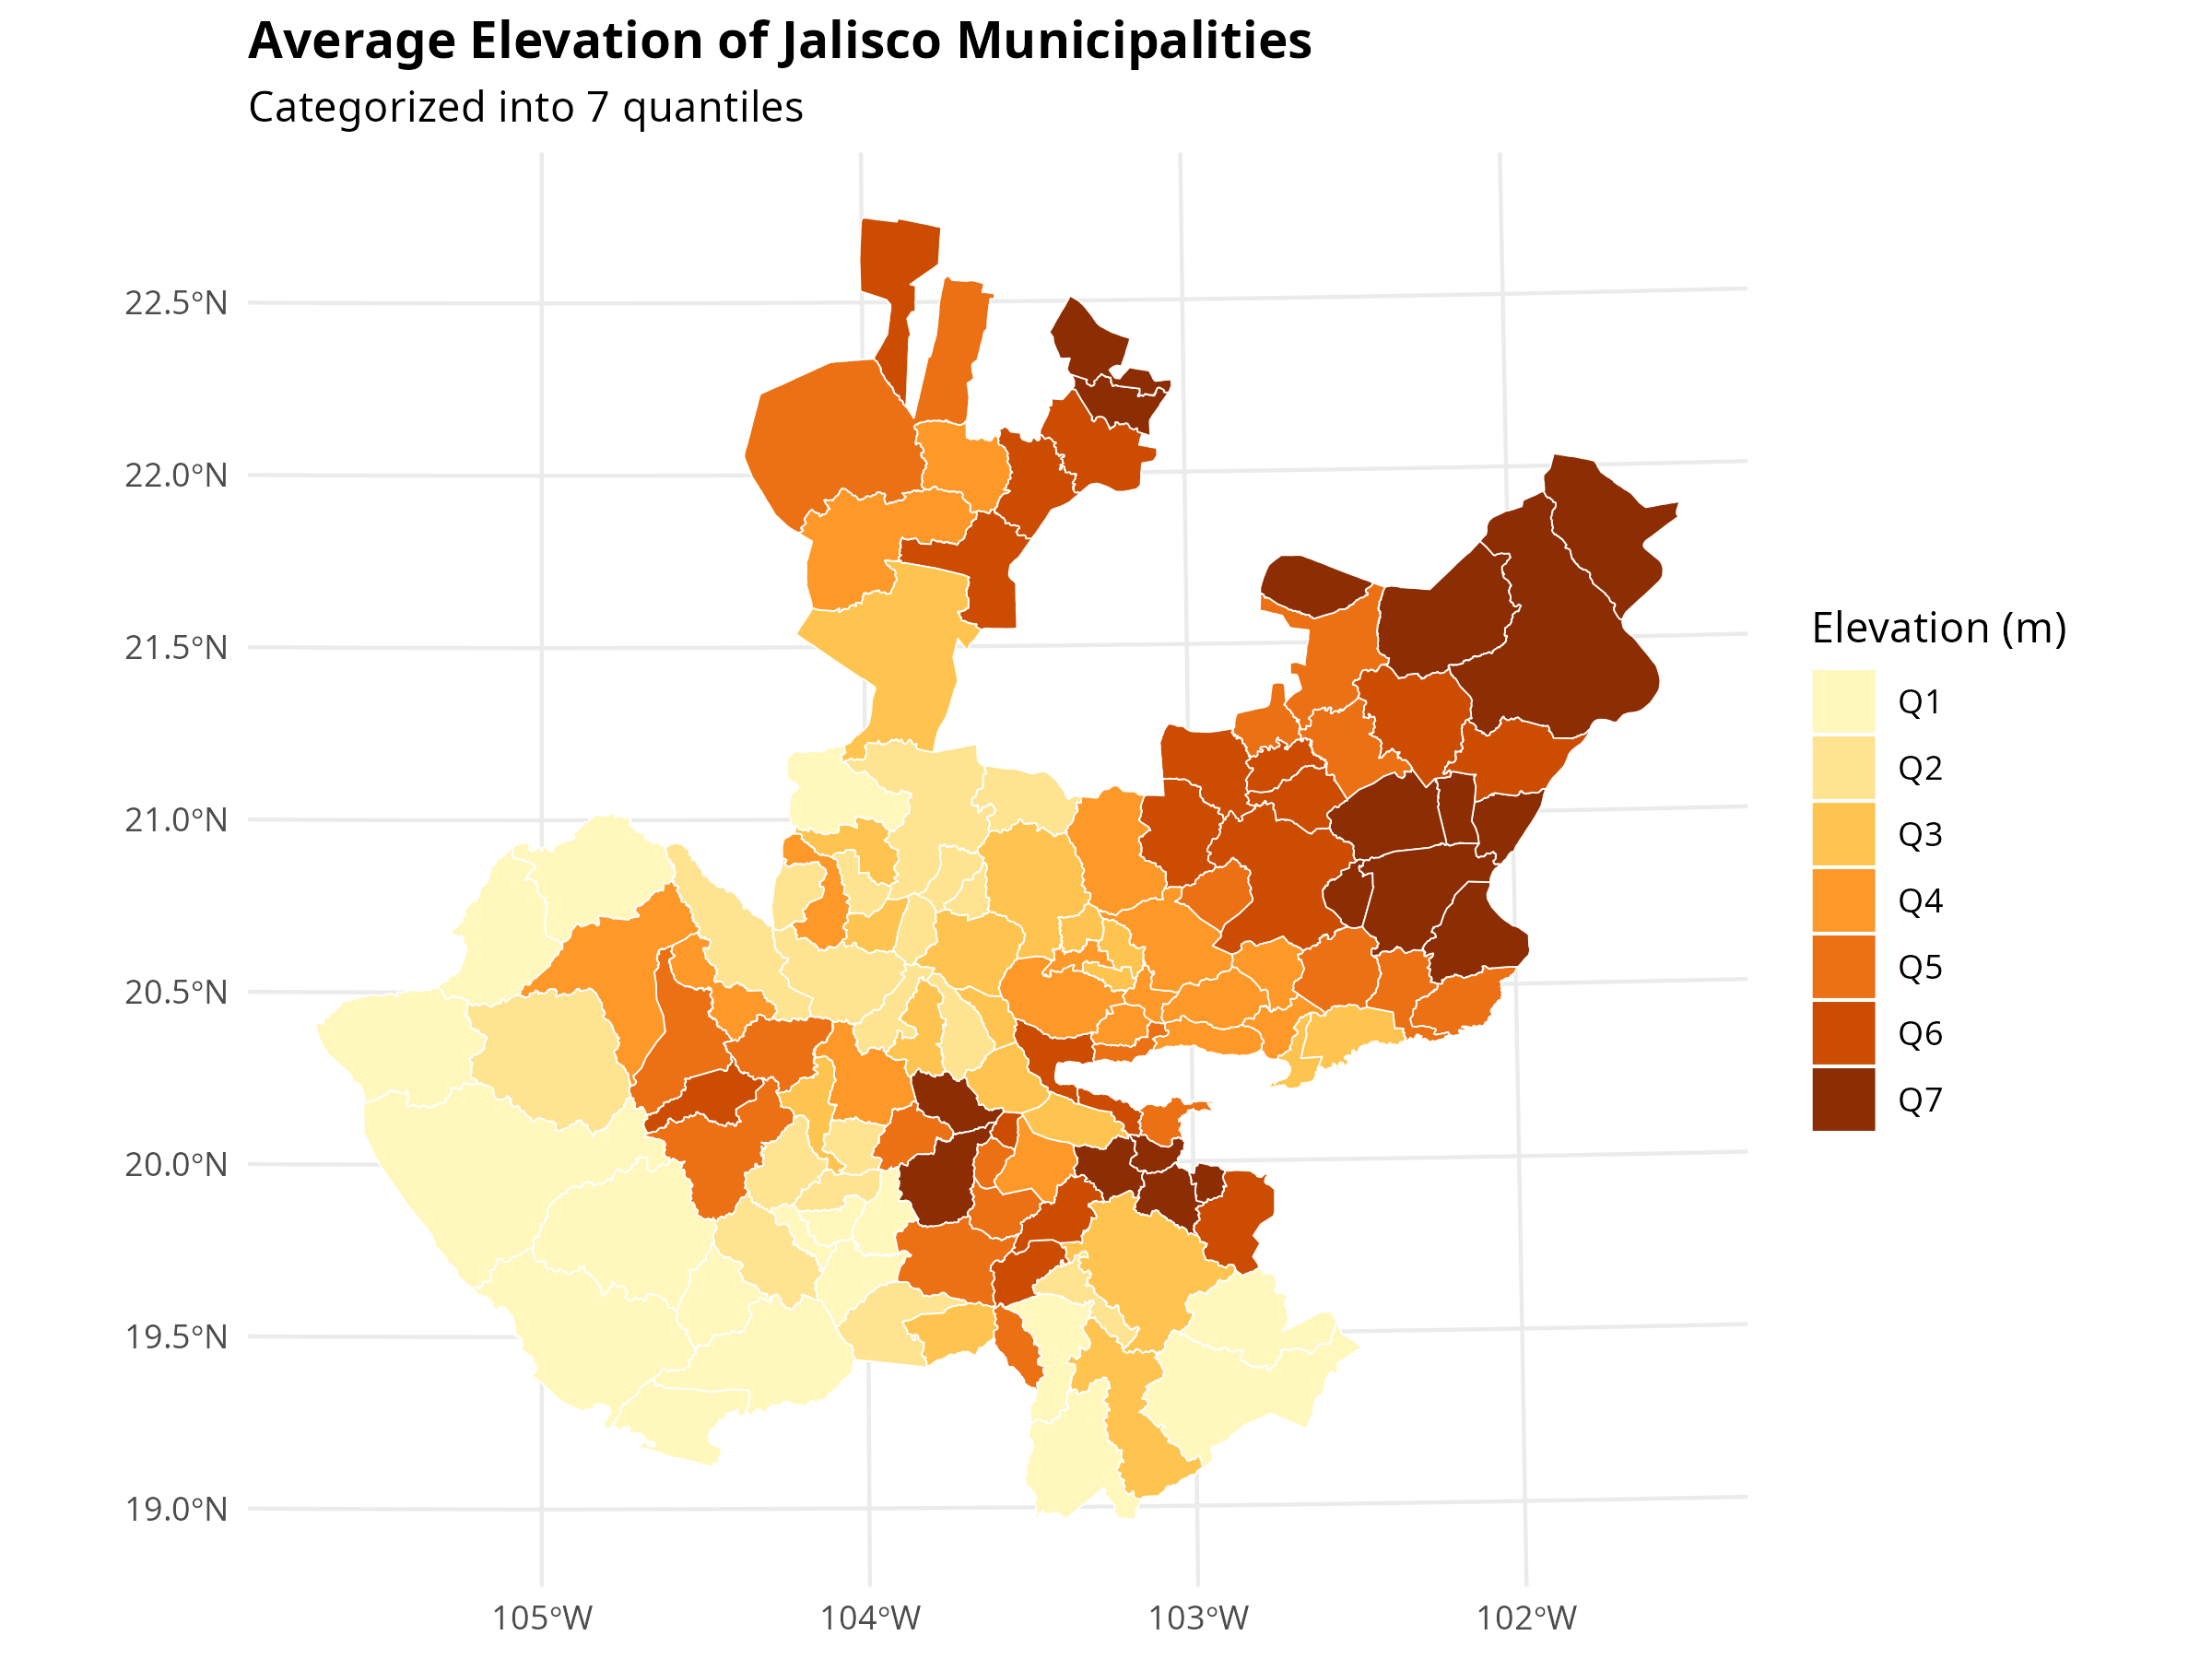

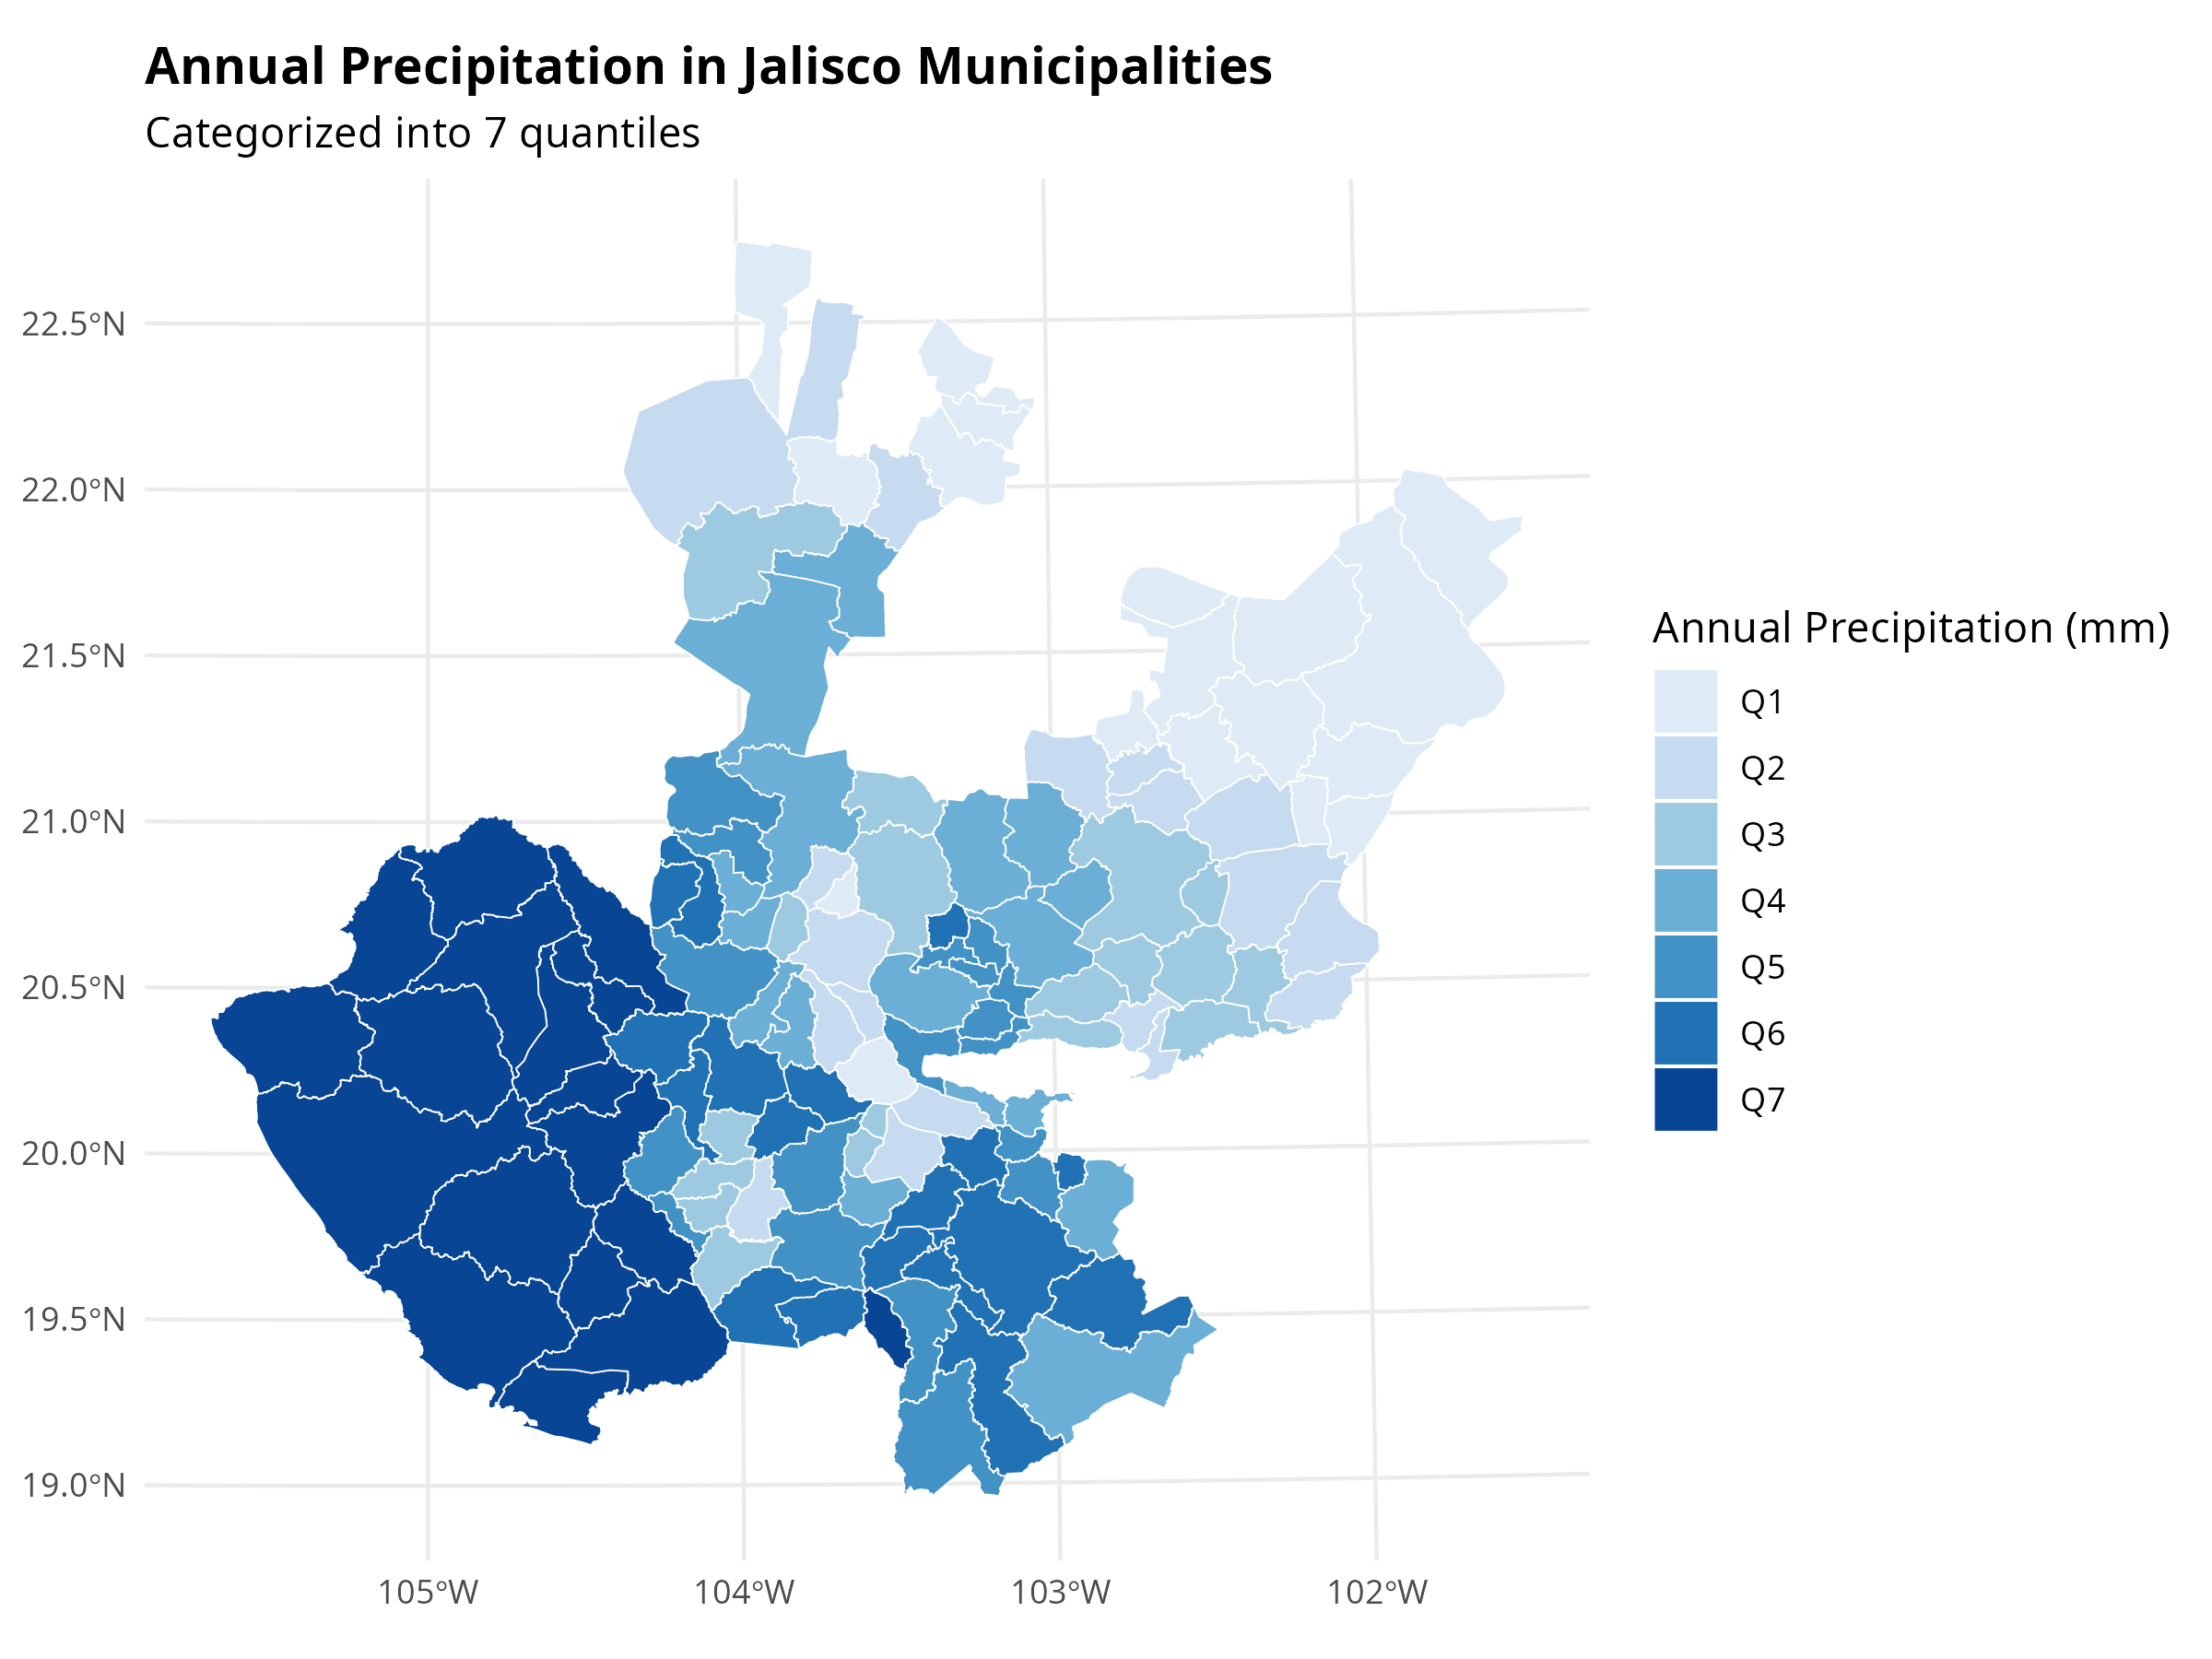

*5.4 Municipalities with Federal Highways*

In [ ]:
# --- Define palette for highways ---
highway_palette <- c("0" = "gray80",   # no highway
                     "1" = "#2ca25f")  # green for highway

# --- Plot highway map ---
map_highway <- ggplot(jalisco_mun) +
  geom_sf(aes(fill = factor(with_federal_highway)), color = "white", size = 0.2) +
  scale_fill_manual(values = highway_palette,
                    labels = c("0" = "No highway",
                               "1" = "With highway"),
                    name = "Federal Toll Highway") +
  theme_minimal() +
  labs(title = "Federal Toll Highways in Jalisco Municipalities",
       subtitle = "Green = highway present, Gray = no highway") +
  theme(legend.position = "right",
        plot.title = element_text(face = "bold"))

# --- Save map as PNG ---
ggsave("images/jalisco4_highway_map.png", plot = map_highway, width = 8, height = 6, dpi = 300)

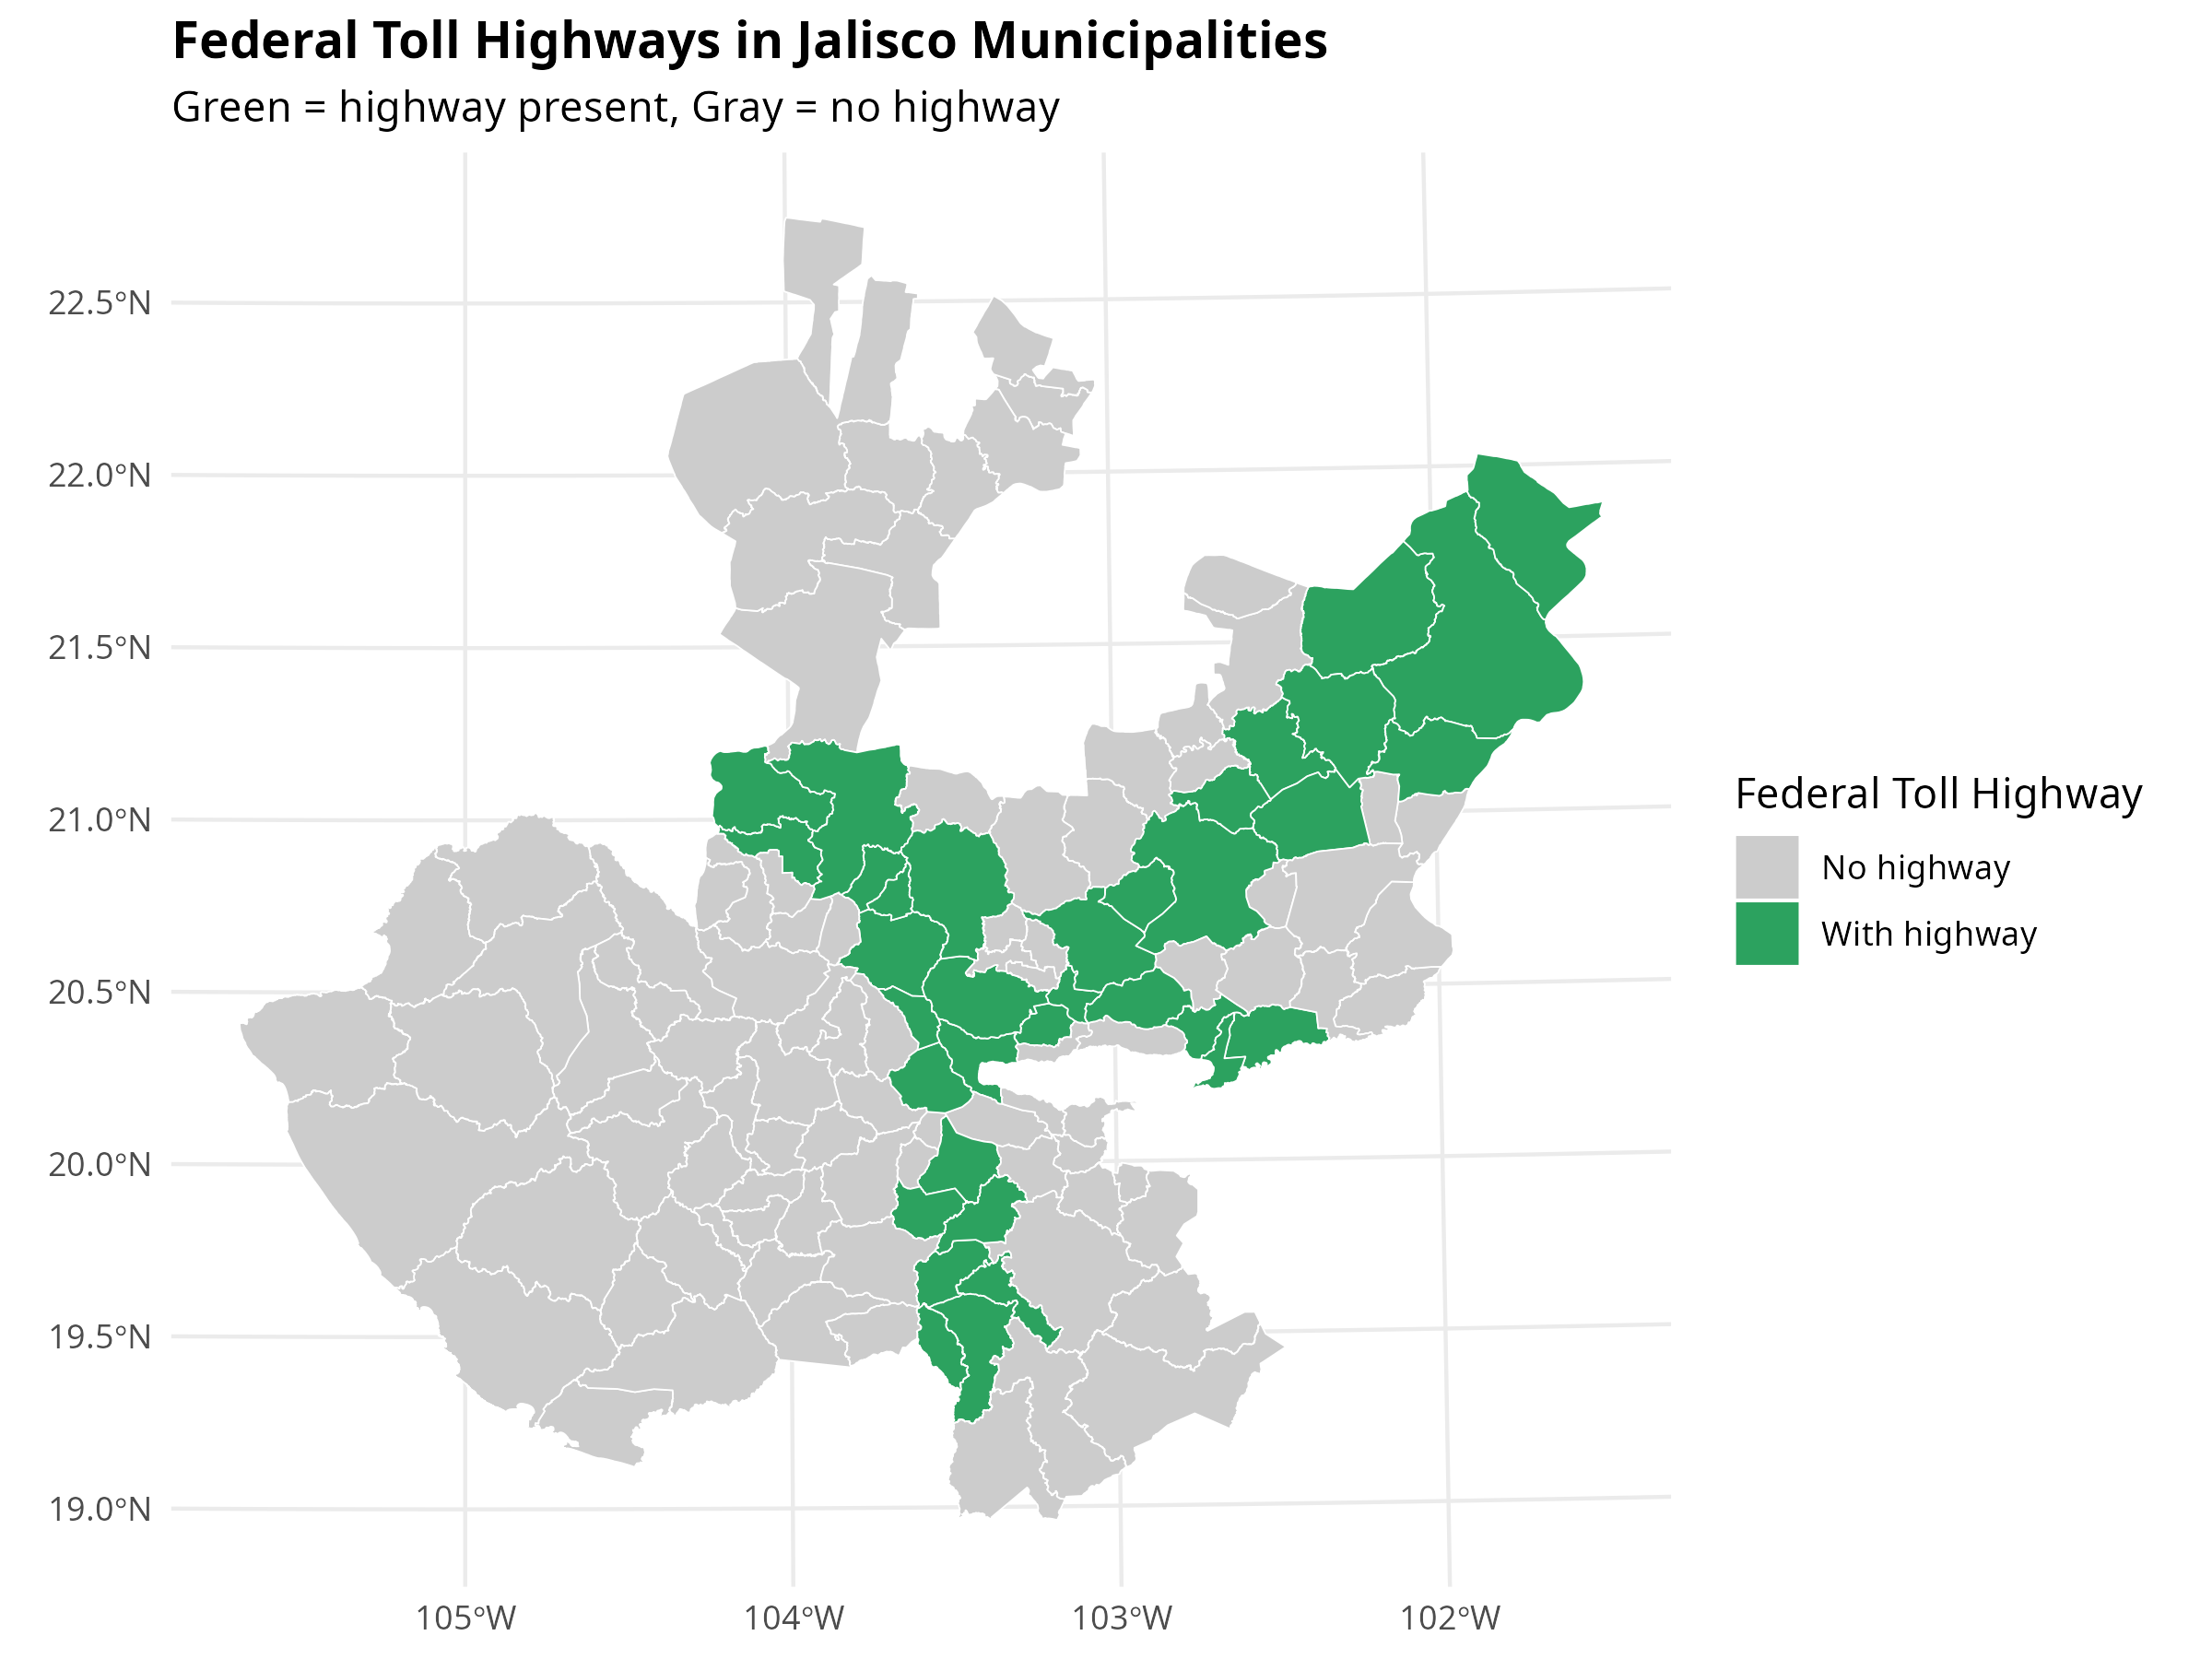

*5.5 Number of people employed in agriculture*

In [ ]:
library(dplyr)
library(ggplot2)

# --- Create quantile categories for agricultural labor ---
jalisco_mun <- jalisco_mun %>%
  mutate(labor_cat = cut(labor_ag_thousands,
                         breaks = quantile(labor_ag_thousands, probs = seq(0, 1, length.out = 8), na.rm = TRUE),
                         include.lowest = TRUE,
                         labels = FALSE))

# --- Define green palette (7 shades) ---
green_palette <- c("#edf8e9", "#c7e9c0", "#a1d99b", "#74c476", "#41ab5d", "#238b45", "#005a32")

# --- Plot map ---
map_labor <- ggplot(jalisco_mun) +
  geom_sf(aes(fill = factor(labor_cat)), color = "white", size = 0.2) +
  scale_fill_manual(values = green_palette,
                    name = "Agricultural Workers\n(thousands)",
                    labels = paste0("Q", 1:7)) +
  theme_minimal() +
  labs(title = "Agricultural Labor in Jalisco Municipalities",
       subtitle = "Categorized into 7 quantiles") +
  theme(legend.position = "right",
        plot.title = element_text(face = "bold"))

# --- Save map as PNG ---
ggsave("images/jalisco5_agricultural_labor_map.png", plot = map_labor, width = 8, height = 6, dpi = 300)

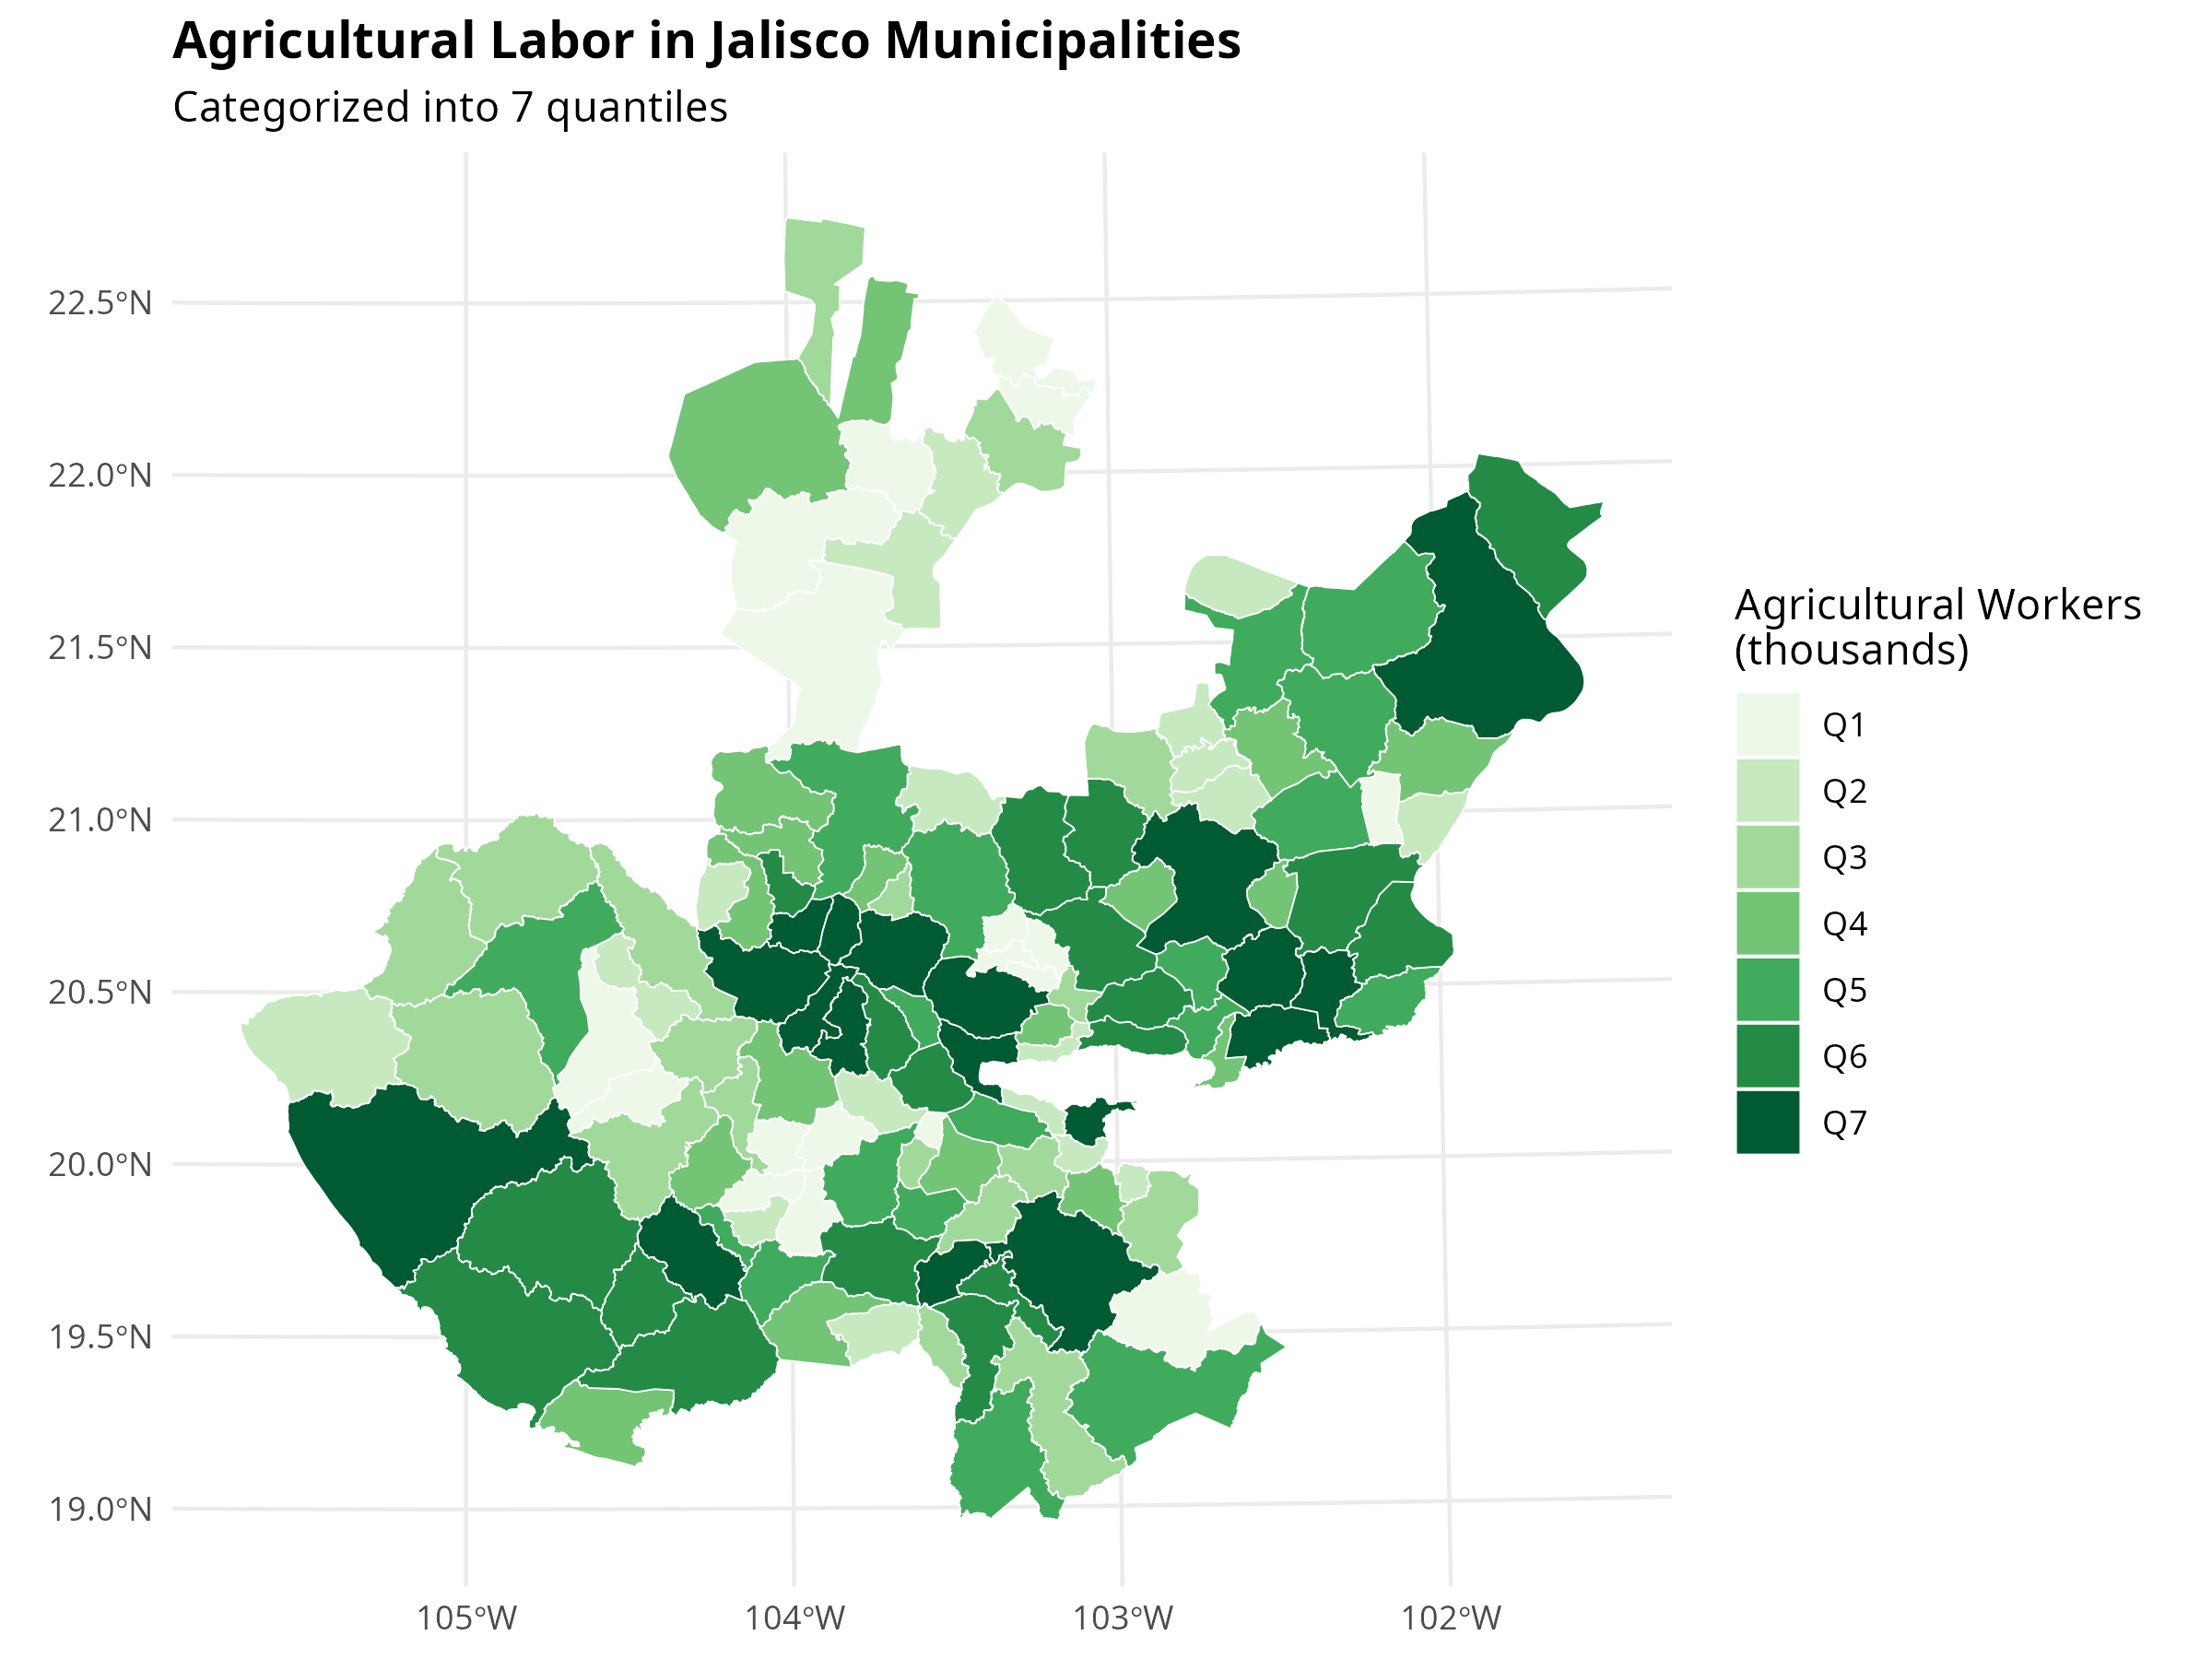

*5.6 Hectares dedicated to agriculture with irrigation system per municipality*

In [ ]:
library(dplyr)
library(ggplot2)

# --- Create quantile categories for irrigated hectares ---
jalisco_mun <- jalisco_mun %>%
  mutate(irrig_cat = cut(irrigation_ha_thousands,
                         breaks = quantile(irrigation_ha_thousands, probs = seq(0, 1, length.out = 8), na.rm = TRUE),
                         include.lowest = TRUE,
                         labels = FALSE))

# --- Define blue palette (7 shades) ---
irrig_palette <- c("#f7fbff",  # very light blue
                   "#deebf7",  # pale blue
                   "#c6dbef",  # soft blue
                   "#9ecae1",  # medium blue
                   "#6baed6",  # stronger blue
                   "#3182bd",  # dark blue
                   "#08519c")  # deep navy


# --- Plot map ---
map_irrig <- ggplot(jalisco_mun) +
  geom_sf(aes(fill = factor(irrig_cat)), color = "white", size = 0.2) +
  scale_fill_manual(values = irrig_palette,
                    name = "Irrigated Area\n(thousands ha)",
                    labels = paste0("Q", 1:7)) +
  theme_minimal() +
  labs(title = "Irrigated Agricultural Area in Jalisco Municipalities",
       subtitle = "Categorized into 7 quantiles") +
  theme(legend.position = "right",
        plot.title = element_text(face = "bold"))

# --- Save map as PNG ---
ggsave("images/jalisco6_irrigation_map.png", plot = map_irrig, width = 8, height = 6, dpi = 300)

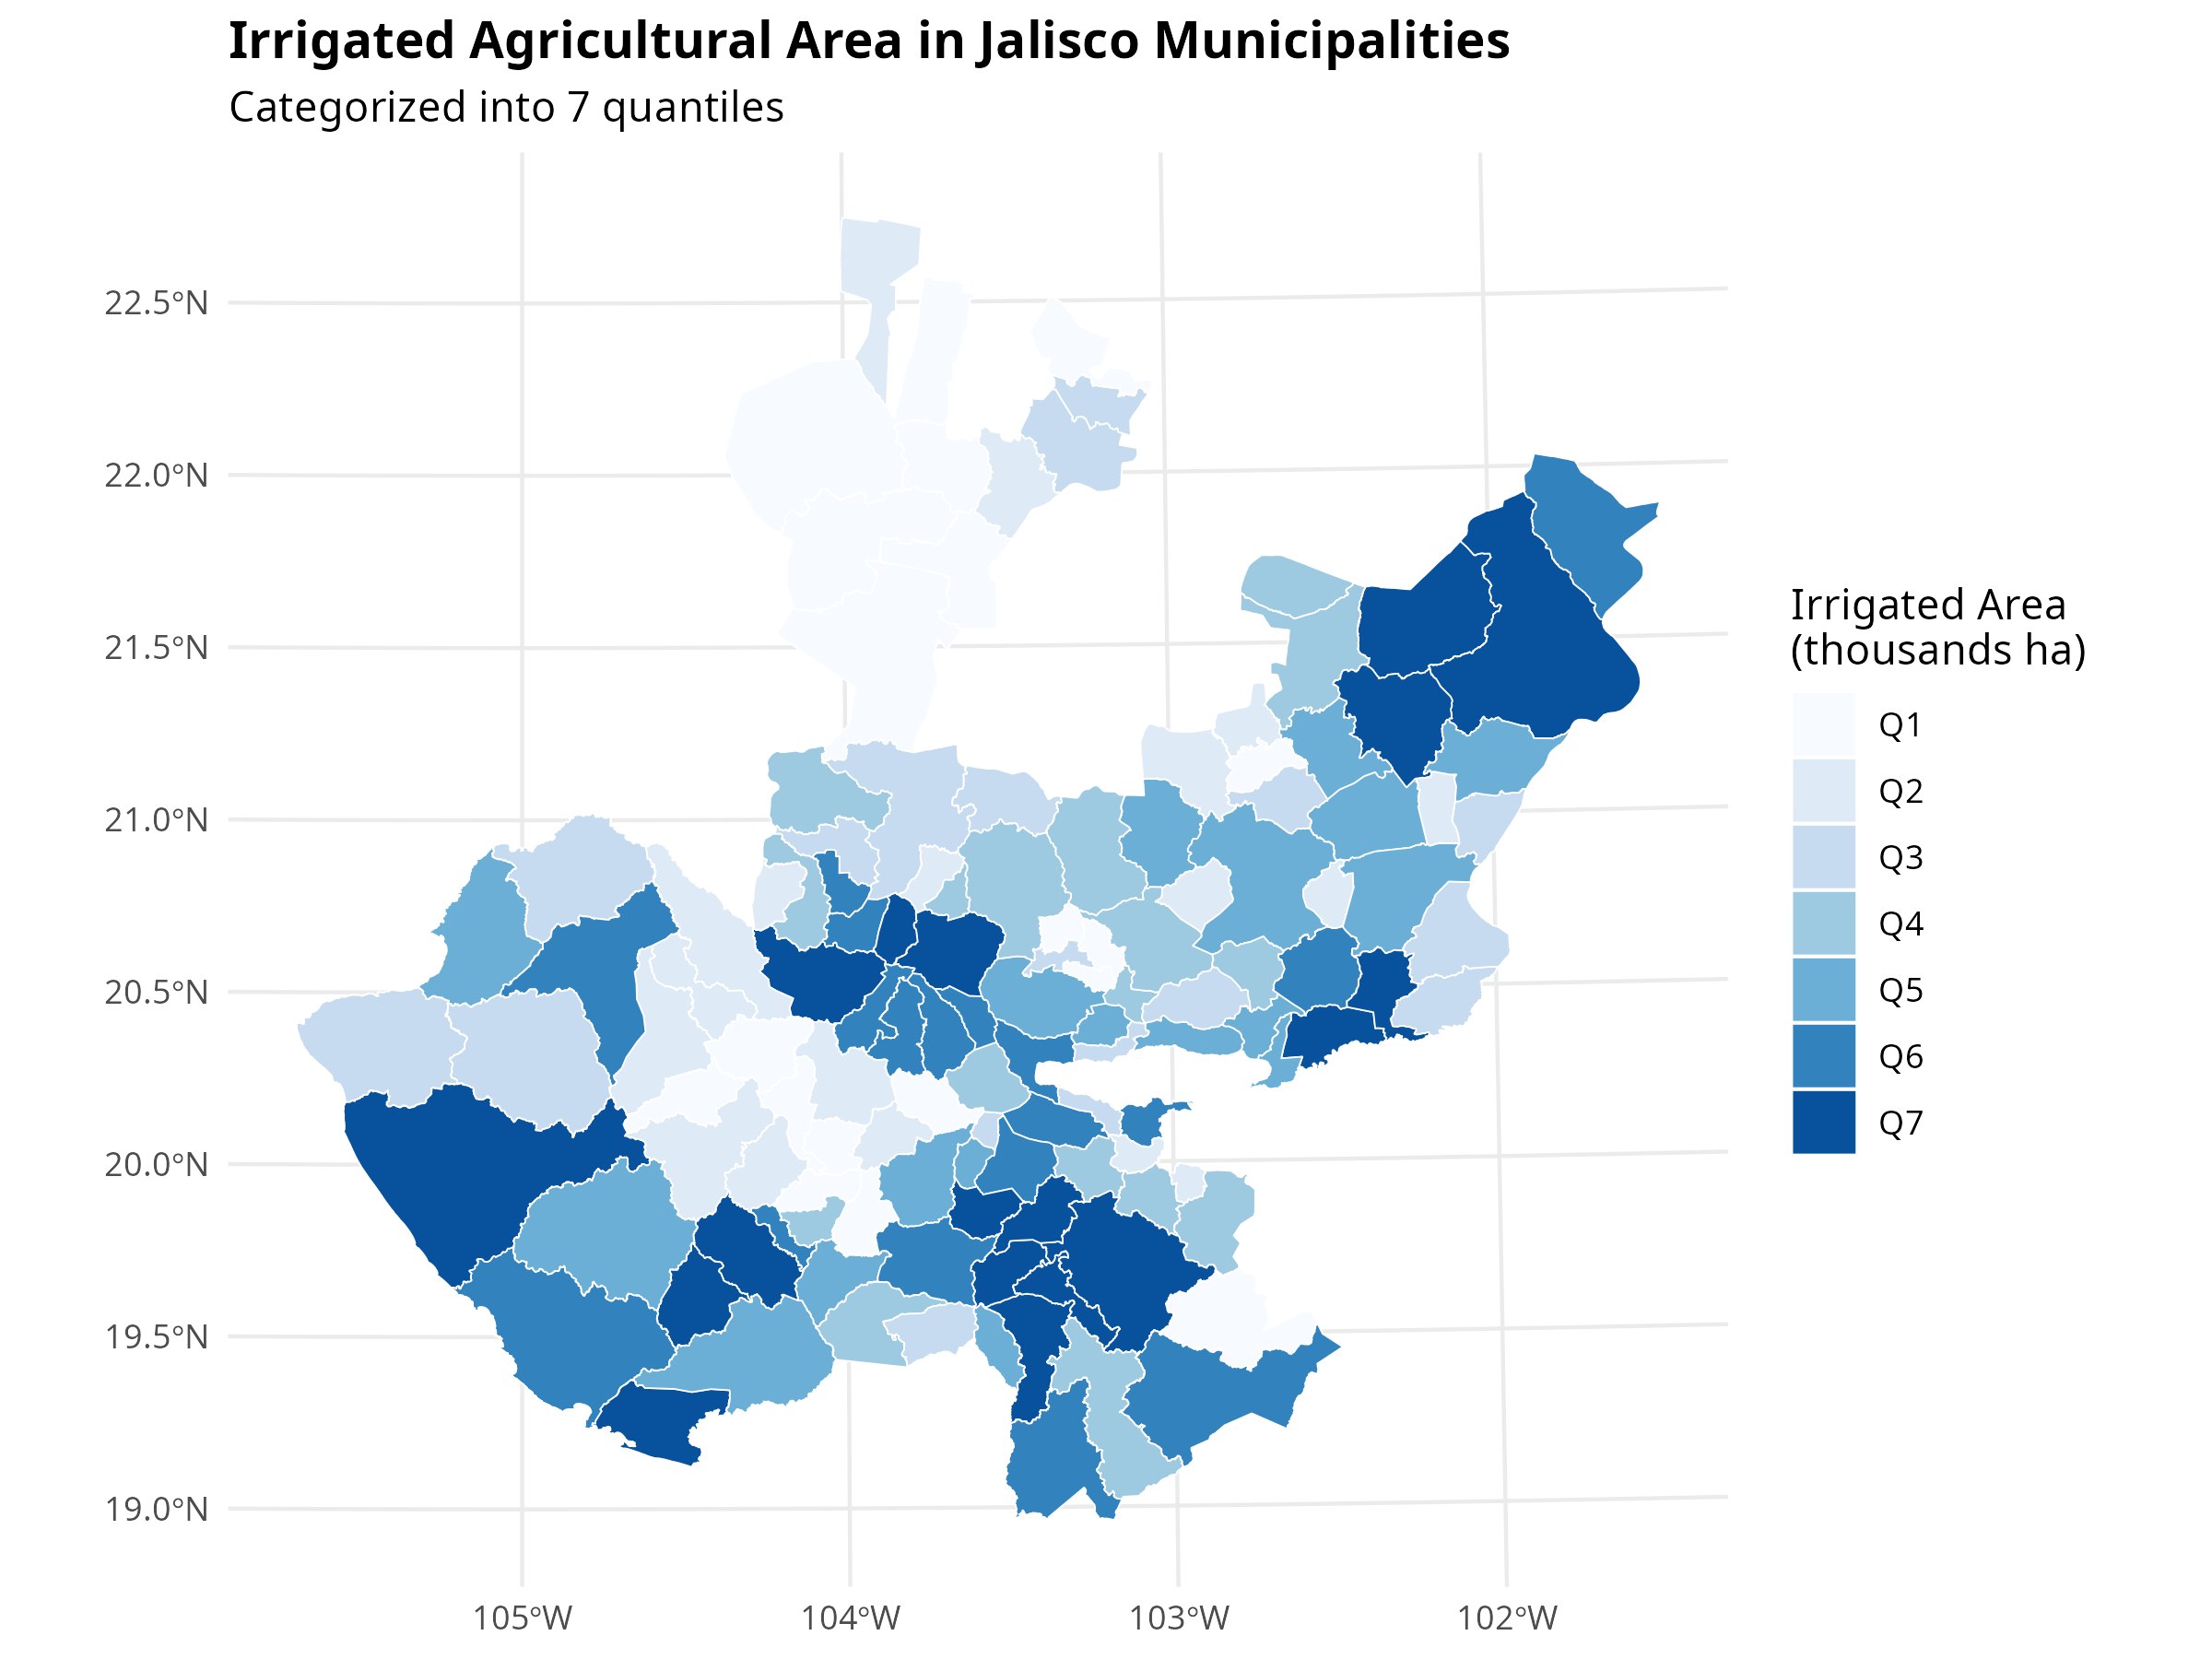

## Non-Spatial Correlation

*6. The standard OLS regression with explanatory variables.*

Using simple OLS regression with information avaible, we will assess the predictors for observing berries plantations in a municipality in Jalisco.

In [ ]:
# Standard OLS regression
ols_model <- lm(berry_place ~ avg_elev_m +
                  irrigation_ha_thousands + precipitation_good +
                  labor_ag_thousands + with_federal_highway +
                  surface_perc_ag,
                data = jalisco_mun)

summary(ols_model)


Call:
lm(formula = berry_place ~ avg_elev_m + irrigation_ha_thousands + 
    precipitation_good + labor_ag_thousands + with_federal_highway + 
    surface_perc_ag, data = jalisco_mun)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7769 -0.2841 -0.1051  0.3764  1.0500 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)   
(Intercept)             -2.879e-01  1.865e-01  -1.544  0.12526   
avg_elev_m               2.256e-04  9.835e-05   2.294  0.02356 * 
irrigation_ha_thousands  2.423e-02  1.719e-02   1.409  0.16140   
precipitation_good       3.082e-01  9.337e-02   3.301  0.00127 **
labor_ag_thousands       1.715e-02  7.724e-03   2.221  0.02829 * 
with_federal_highway     9.456e-02  8.594e-02   1.100  0.27342   
surface_perc_ag         -3.872e-01  2.014e-01  -1.922  0.05700 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4033 on 118 degrees of freedom
Multiple R-squared:  0.2745,    Adjusted R-squared: 

RESULTS:

Residuals: Min 1Q Median 3Q Max -0.7769 -0.2841 -0.1051 0.3764 1.0500

Coefficients: Estimate Std. Error t value Pr(\>\|t\|)  
(Intercept) -2.879e-01 1.865e-01 -1.544 0.12526  
avg_elev_m 2.256e-04 9.835e-05 2.294 0.02356 \* irrigation_ha_thousands 2.423e-02 1.719e-02 1.409 0.16140  
precipitation_good 3.082e-01 9.337e-02 3.301 0.00127 **labor_ag_thousands 1.715e-02 7.724e-03 2.221 0.02829 \* with_federal_highway 9.456e-02 8.594e-02 1.100 0.27342  
surface_perc_ag -3.872e-01 2.014e-01 -1.922 0.05700 . — Signif. codes: 0 ’**\*’ 0.001 ‘\*\*’ 0.01 ‘\*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4033 on 118 degrees of freedom Multiple R-squared: 0.2745, Adjusted R-squared: 0.2376 F-statistic: 7.439 on 6 and 118 DF, p-value: 9.052e-07

INTERPRETATION:

So far, from the non-spatial model, we know that the only significant variables —all of them positively correlated— that help to predict berries plantation are: - Precipitation being in optimal conditions for berries has p-value of 0.001 - Average elevation of the municipality has a p-value of 0.024 - Number of workers dedicated to agriculture has a p-value of 0.028

Surface dedicated to agriculture is negatively correlated. This means that larger municipalities with more extensive areas for agriculture is not in close relationship with this particular crop.

## Spatial Correlation: Moran’s I

*7. Compute Moran’s I on the residuals*

Before moving to spatial lag regression, we check whether residuals are spatially autocorrelated.

Steps: - Build a spatial weights matrix (based on municipality adjacency or distance). - Compute Moran’s I on the residuals of your OLS model.

In [ ]:
library(spdep)

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`


    Moran I test under randomisation

data:  residuals(ols_model)  
weights: lw    

Moran I statistic standard deviate = 3.7265, p-value = 9.708e-05
alternative hypothesis: greater
sample estimates:
Moran I statistic       Expectation          Variance 
      0.215528846      -0.008064516       0.003600136 

RESULTS:

    Moran I test under randomisation

data: residuals(ols_model)  
weights: lw

Moran I statistic standard deviate = 3.7265, p-value = 9.708e-05 alternative hypothesis: greater sample estimates: Moran I statistic Expectation Variance 0.215528846 -0.008064516 0.003600136

INTERPRETATION:

-   Moran’s I statistic = 0.216 → Positive and moderate spatial autocorrelation.
-   Expectation = -0.008 → What Moran’s I would be under pure randomness (close to zero).
-   Standard deviate = 3.73, p-value ≈ 0.000097 → Highly significant.

This means your OLS residuals are spatially clustered: municipalities with similar residuals are near each other. In other words, the non‑spatial regression is missing spatial dynamics.

## Spatial Lag Regresion

*8. Add a neighbors’ berry presence as a predictor*

Whether the neighboring municipality produces berries is a spatially lagged dependent variable.

In [ ]:
# Install package for spatial regression
install.packages("spatialreg") 

Installing package into '/home/jupyter-jf1677/R/x86_64-pc-linux-gnu-library/4.3'
(as 'lib' is unspecified)

code for regression here:

In [ ]:
# load library
library(spatialreg)

Loading required package: Matrix


Attaching package: 'spatialreg'

The following objects are masked from 'package:spdep':

    get.ClusterOption, get.coresOption, get.mcOption,
    get.VerboseOption, get.ZeroPolicyOption, set.ClusterOption,
    set.coresOption, set.mcOption, set.VerboseOption,
    set.ZeroPolicyOption


Call:lagsarlm(formula = berry_place ~ avg_elev_m + irrigation_ha_thousands + 
    precipitation_good + labor_ag_thousands + with_federal_highway + 
    surface_perc_ag, data = jalisco_mun, listw = lw)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.688500 -0.241734 -0.045194  0.246270  0.825377 

Type: lag 
Coefficients: (asymptotic standard errors) 
                           Estimate  Std. Error z value Pr(>|z|)
(Intercept)             -2.7028e-01  1.6825e-01 -1.6064  0.10818
avg_elev_m               2.0599e-04  8.9389e-05  2.3044  0.02120
irrigation_ha_thousands  2.1573e-02  1.5513e-02  1.3907  0.16432
precipitation_good       1.7671e-01  8.5875e-02  2.0577  0.03962
labor_ag_thousands       1.4783e-02  7.0064e-03  2.1099  0.03487
with_federal_highway     5.2283e-02  7.8870e-02  0.6629  0.50739
surface_perc_ag         -3.4450e-01  1.8246e-01 -1.8881  0.05901

Rho: 0.38954, LR test value: 13.979, p-value: 0.00018485
Asymptotic standard error: 0.098396
    z-value: 3

RESULTS SPATIAL LAG MODEL:

Residuals: Min 1Q Median 3Q Max -0.688500 -0.241734 -0.045194 0.246270 0.825377

Type: lag Coefficients: (asymptotic standard errors) Estimate Std. Error z value Pr(\>\|z\|) (Intercept) -2.7028e-01 1.6825e-01 -1.6064 0.10818 avg_elev_m 2.0599e-04 8.9389e-05 2.3044 0.02120 irrigation_ha_thousands 2.1573e-02 1.5513e-02 1.3907 0.16432 precipitation_good 1.7671e-01 8.5875e-02 2.0577 0.03962 labor_ag_thousands 1.4783e-02 7.0064e-03 2.1099 0.03487 with_federal_highway 5.2283e-02 7.8870e-02 0.6629 0.50739 surface_perc_ag -3.4450e-01 1.8246e-01 -1.8881 0.05901

Rho: 0.38954, LR test value: 13.979, p-value: 0.00018485 Asymptotic standard error: 0.098396 z-value: 3.9589, p-value: 7.528e-05 Wald statistic: 15.673, p-value: 7.528e-05

Log likelihood: -53.25478 for lag model ML residual variance (sigma squared): 0.1324, (sigma: 0.36387) Number of observations: 125 Number of parameters estimated: 9 AIC: 124.51, (AIC for lm: 136.49) LM test for residual autocorrelation test value: 0.48735, p-value: 0.48511

INTERPRETATION:

-   Rho (ρ) = 0.39, p \< 0.001 → Strong and statistically significant spatial dependence. Berry cultivation in one municipality is positively associated with cultivation in neighboring municipalities. This confirms the clustering effect you suspected.

-   Model fit (AIC = 124.5 vs OLS AIC = 136.5) → The spatial lag model fits better than the OLS baseline. Lower AIC means the SAR model explains the data more efficiently.

-   Residual autocorrelation test (LM test p = 0.485) → No significant spatial autocorrelation remains in the residuals. This means the lag model successfully absorbed the spatial clustering that OLS left behind.

-   Significant predictors: Altitude (avg_elev_m, p = 0.021) → Higher elevation increases likelihood of berry cultivation. Precipitation_good (p = 0.040) → Favorable precipitation conditions matter. Labor_ag_thousands (p = 0.035) → More agricultural workers increase berry cultivation. Surface_perc_ag (p = 0.059, marginal) → Higher share of land in agriculture is negatively associated (possibly competition with other crops).

-   Non‑significant predictors: Irrigation hectares (p = 0.16) Federal highway presence (p = 0.51)

## Conclusion of the spatial analysis

The Spatial Lag Model shows that neighboring municipalities’ berry cultivation has a strong spillover effect (ρ ≈ 0.39). This validates the hypothesis about clustering: berries are not only driven by agroclimatic and labor conditions, but also by spatial dynamics such as proximity to existing plantations, services, or cold storage.

*Policy interpretation*

-   Spatial spillovers suggest that supporting clusters (e.g., infrastructure, cold storage hubs) could amplify berry expansion.
-   Agroclimatic suitability and labor availability remain key, but clustering magnifies their effect

*Policy implications*

The spatial lag analysis confirms that berry cultivation in Jalisco is not only shaped by agroclimatic suitability and labor availability, but also by strong spillover effects from neighboring municipalities. This clustering dynamic suggests that subsidies for agricultural technologies will have greater impact if they are targeted toward municipalities already embedded in or adjacent to existing berry production zones.

By concentrating support in these clusters—such as precision irrigation, cold storage facilities, or improved transport logistics—the Department of Agriculture can leverage spatial spillovers to accelerate adoption and productivity gains. At the same time, prioritizing areas with favorable altitude and precipitation conditions ensures that subsidies align with natural suitability, while recognizing that labor-intensive production requires complementary investments in workforce training.

In practice, this means that subsidy programs should not be distributed uniformly across the state, but strategically directed to municipalities where agroclimatic advantages and spatial clustering combine to maximize the likelihood of sustained expansion in berry cultivation.

## Sources of information and data

Servicio Nacional de Sanidad, Inocuidad y Calidad Agroalimentaria (SENASICA). (2025, August 6). Berries, second product of the field with the highest export value: Agriculture. Gobierno de México. https://www.gob.mx/senasica/documentos/berries-second-product-of-the-field-with-the-highest-export-value-agriculture

*Hectares of berries harvested*

Source: https://nube.agricultura.gob.mx/cierre_agricola/ Anuario Estadístico de la Producción Agrícola, 2024. Secretaría de Agricultura 2024: Arandano, Frambuesa, Zarzamora, Fresa – for any market, any production modality

*Percentage of surface dedicated to agriculture*

Source: https://www.inegi.org.mx/contenidos/programas/ca/2022/datosabiertos/ca_2022_superficie_csv.zip Censo Agropecuario 2022. INEGI

*Surface with irrigation in hectares, and labor dedicated to agriculture*

Source: https://www.inegi.org.mx/contenidos/programas/ca/2022/datosabiertos/ca_2022_upagro_csv.zip Censo Agropecuario 2022. INEGI

*Highways in Jalisco*

Red Nacional de Caminos https://en.www.inegi.org.mx/app/biblioteca/ficha.html?upc=794551132166